In [96]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas
from geodatasets import get_path
import folium
from folium.plugins import HeatMap

***Task-3: Geographic Analysis***

In [97]:

url="https://drive.google.com/file/d/1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y/view?usp=drive_link"
url='https://drive.google.com/uc?id='+url.split('/')[-2]
df=pd.read_csv(url)

***Plot the locations of restaurants on a map using longitude and latitude coordinates.***

In [98]:
print(df[["Longitude","Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [99]:
gdf=geopandas.GeoDataFrame(df,geometry=geopandas.points_from_xy(df.Longitude,df.Latitude),crs='EPSG:4326')

In [100]:
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

<Axes: >

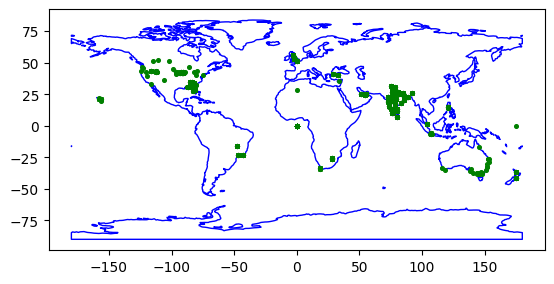

In [101]:
world=geopandas.read_file(get_path("naturalearth.land"))
ax=world.plot(color="White",edgecolor='blue')
gdf.plot(ax=ax,marker='o',color="green",markersize=7)

In [102]:
plt.show()

***Identify any patterns or clusters of restaurants in specific areas.***

In [103]:
world_map=folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()],zoom_start=1,height='100%',width='100%')

In [104]:
heat_marker=([row['Latitude'],row['Longitude']]for i , row in df.iterrows())
HeatMap(heat_marker,radius=10).add_to(world_map)

In [105]:
world_map